In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Mors as mors
import nbimporter
import Functions as fun
import os

In [2]:
ages = np.linspace(50,5000,10000)
data = pd.read_csv('updated.csv')
masses,chz = data['Mass'],data['CHZ']
eff = 0.3
m_atm_frac = 5e-3
r_atm_frac = 0.1

In [3]:
planet_masses = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2.0,5,10,15,20,25,50,75,100,125,150,200,250,300,350,400])
planet_radii = fun.findRadius(planet_masses)
stars25=[]
stars50=[]
stars75=[]
stars95=[]

for i,star in enumerate(sorted(os.listdir('rp25'))):
    file_path = os.path.join('rp25', star)
    stars25.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp50'))):
    file_path = os.path.join('rp50', star)
    stars50.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp75'))):
    file_path = os.path.join('rp75', star)
    stars75.append(mors.Load(file_path))

for i,star in enumerate(sorted(os.listdir('rp95'))):
    file_path = os.path.join('rp95', star)
    stars95.append(mors.Load(file_path))


stars = [stars25,stars50,stars75,stars95]

In [4]:
smallest_stars = [stars25[0],stars50[0],stars75[0],stars95[0]]
file_path1 = 'rp25/p25_m0.6.pickle'
file_path2 = 'rp50/p50_m0.6.pickle'
file_path3 = 'rp75/p75_m0.6.pickle'
file_path4 = 'rp95/p95_m0.6.pickle' 
medium_stars = []
medium_stars.append(mors.Load(file_path1))
medium_stars.append(mors.Load(file_path2))
medium_stars.append(mors.Load(file_path3))
medium_stars.append(mors.Load(file_path4))
file_path5 = 'rp25/p25_m1.0.pickle'
file_path6 = 'rp50/p50_m1.0.pickle'
file_path7 = 'rp75/p75_m1.0.pickle'
file_path8 = 'rp95/p95_m1.0.pickle'
big_stars = []
big_stars.append(mors.Load(file_path5))
big_stars.append(mors.Load(file_path6))
big_stars.append(mors.Load(file_path7))
big_stars.append(mors.Load(file_path8))

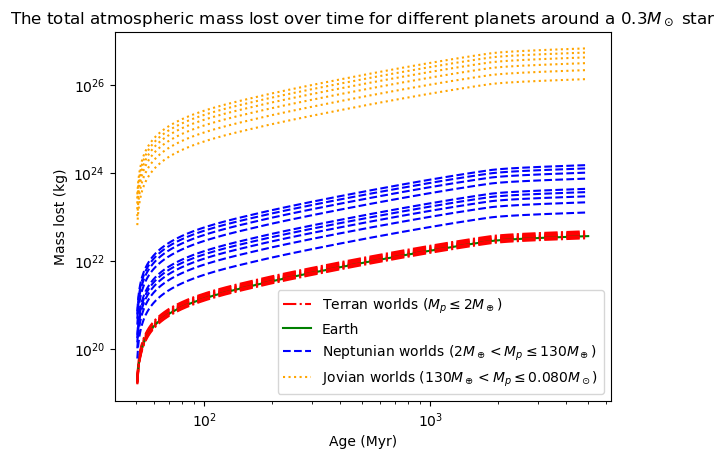

In [15]:
for mass,rad in zip(planet_masses,planet_radii):
    mlr = fun.totalMassLost(ages,[stars95[0]],eff,mass,rad,np.array([chz[0]]),r_atm_frac,m_atm_frac)
    if mass <= 2:
        if mass == 1.0:
            plt.plot(ages[1:],mlr[0],color = 'green', linestyle = '-',label='Earth')
        if mass == 0.2:
            plt.plot(ages[1:],mlr[0],color = 'red', linestyle = 'dashdot', label=rf'Terran worlds ($M_p \leq 2M_\oplus$)')
        else:
            plt.plot(ages[1:],mlr[0],color = 'red', linestyle = 'dashdot')
    elif mass <= 130:
        if mass == 5:
            plt.plot(ages[1:],mlr[0],color = 'blue', linestyle = '--',label=rf'Neptunian worlds ($2M_\oplus < M_p \leq 130M_\oplus$)')
        else:
            plt.plot(ages[1:],mlr[0],color='blue',linestyle='--')
    elif mass <= 26635:
        if mass == 150:
            plt.plot(ages[1:],mlr[0],color = 'orange', linestyle = ':', label=rf'Jovian worlds ($130M_\oplus < M_p \leq 0.080M_\odot$)')
        else:
            plt.plot(ages[1:],mlr[0],color = 'orange', linestyle = ':')
plt.title(r'The total atmospheric mass lost over time for different planets around a $0.3M_\odot$ star')
plt.ylabel('Mass lost (kg)')
plt.xlabel('Age (Myr)')
plt.xscale('log')
plt.yscale('log')

plt.legend()

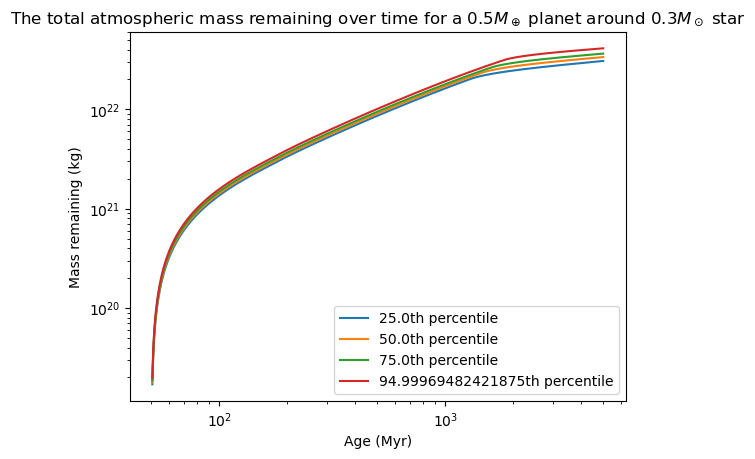

In [7]:
mlr = fun.totalMassLost(ages,smallest_stars,eff,small_masses[5],rocky_radii[5],np.array([chz[0]]),r_atm_frac,m_atm_frac)
for i,star in enumerate(smallest_stars):
    plt.plot(ages[1:],mlr[i],label=f'{star.percentile}th percentile')
plt.title(r'The total atmospheric mass remaining over time for a $0.5M_\oplus$ planet around $0.3M_\odot$ star')
plt.ylabel('Mass remaining (kg)')
plt.xlabel('Age (Myr)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

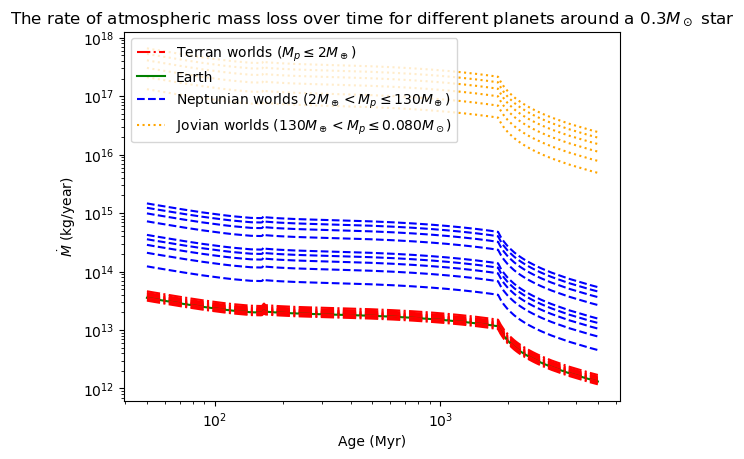

In [17]:
#Mdot plots
plt.title(r'The rate of atmospheric mass loss over time for different planets around a $0.3M_\odot$ star')
plt.ylabel(rf'$\dot M$ (kg/year)')
plt.xlabel('Age (Myr)')
plt.xscale('log')
plt.yscale('log')

for mass,rad in zip(planet_masses,planet_radii):
    mdot = fun.Mdot(ages,[stars95[0]],eff,mass,rad,np.array([chz[0]]),r_atm_frac,m_atm_frac)
    if mass <= 2:
        if mass == 1.0:
            plt.plot(ages,mdot[0],color = 'green', linestyle = '-',label='Earth')
        if mass == 0.2:
            plt.plot(ages,mdot[0],color = 'red', linestyle = 'dashdot', label=rf'Terran worlds ($M_p \leq 2M_\oplus$)')
        else:
            plt.plot(ages,mdot[0],color = 'red', linestyle = 'dashdot')
    elif mass <= 130:
        if mass == 5:
            plt.plot(ages,mdot[0],color = 'blue', linestyle = '--',label=rf'Neptunian worlds ($2M_\oplus < M_p \leq 130M_\oplus$)')
        else:
            plt.plot(ages,mdot[0],color='blue',linestyle='--')
    elif mass <= 26635:
        if mass == 150:
            plt.plot(ages,mdot[0],color = 'orange', linestyle = ':', label=rf'Jovian worlds ($130M_\oplus < M_p \leq 0.080M_\odot$)')
        else:
            plt.plot(ages,mdot[0],color = 'orange', linestyle = ':')
plt.legend()